In [1]:
# needed libraries for all problems in the assignment
# (I'm assuming we'll reuse them throughout problems)
from pylab import *

# Problem 1

### Equilibrium States
1. All sharks die and there are only fish left
2. All sharks and fish die and there's nobody left
3. 

In [2]:
# Starting from Sayama code 4.11 - 4.15

In [10]:
# initialize

fish = 1.0
sharks = 1.0
fish_result = [fish]
shark_result = [shark]

In [4]:
# observe

def observe(x:int, y:int, xhist:list, yhist:list):
    # Save current round states by adding
    # the current x and y to our arrays of previous x's and y's.
    # Then return our histories as a tuple. 
    # (Since I don't like global variables,
    # we're going to have to keep returning them.)
    xhist.append(x)
    yhist.append(y)
    return (xhist, yhist)

In [7]:
# update

def dead_fish(fish:float):
    fish_death_rate = 0.00001
    return fish * fish_death_rate

def eaten_fish(fish: float, sharks:float):
    predation_encounter_rate = 0.00000 # dummy thing for now
    return predation_encounter_rate * fish * sharks
    # return fish * (1 - (1 - predation_encounter_rate)**sharks)

def hatched_fish(fish:float):
    fish_reproduction_rate = .0001
    return fish * fish_reproduction_rate

def dead_sharks(sharks:float):
    shark_death_rate = 0.00001
    return sharks * shark_death_rate

def hatched_sharks(sharks:float, fish:float):
    predation_encounter_rate = 0.000001
    sharks_per_fish_conversion = .01  # a shark has to eat 100 fish to make a new shark
    # eaten_fish = fish * (1 - (1 - predation_encounter_rate)**sharks)
    eaten_fish = predation_encounter_rate * fish * sharks
    return eaten_fish * sharks_per_fish_conversion

def simultaneous_update(existing_fish, existing_sharks):
    # run our update functions and return the updated versions
    # TODO: is the ordering of this okay?
    next_fish = max(0, existing_fish + hatched_fish(existing_fish) - eaten_fish(existing_fish, existing_sharks) - dead_fish(existing_fish))
    next_sharks = max(0, existing_sharks + hatched_sharks(existing_sharks, existing_fish) - dead_sharks(existing_sharks))
    # next_sharks = -0.5 * x + y
    return (next_fish, next_sharks)
    

In [12]:
# run / simulate

for t in range(30):
    fish, sharks = simultaneous_update(fish, sharks)
    fish_result, shark_result = observe(fish, sharks, fish_result, shark_result)
    


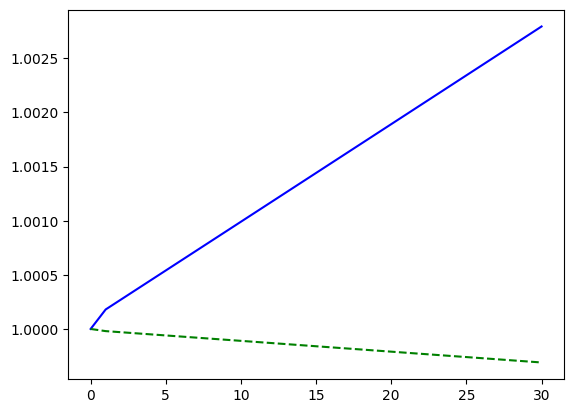

In [14]:
# plot behavior (not technically needed but interesting)
plot(fish_result, 'b-')
plot(shark_result, 'g--')
show()

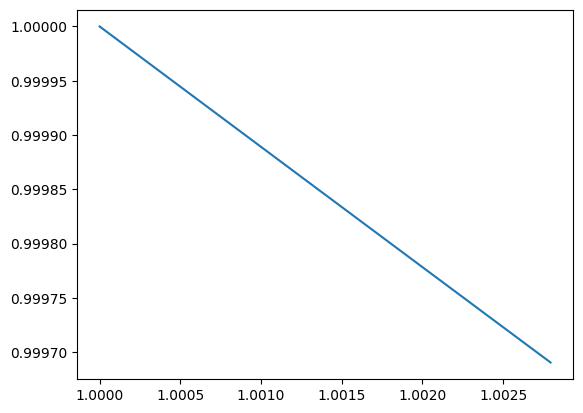

In [16]:
# plot phase space
plot(fish_result, shark_result)